In [4]:
!pip install face_recognition

In [5]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [6]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

face_1 = face_recognition.load_image_file("/content/Donald_Trump_official_portrait.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("/content/Donald_Trump_official_portrait.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file('/content/20211115_205042.jpg')
face_3_encoding = face_recognition.face_encodings(face_3)[0]

face_4 = face_recognition.load_image_file("/content/1200px-President_Barack_Obama.jpg")
face_4_encoding = face_recognition.face_encodings(face_4)[0]

known_face_encodings = [
                        face_1_encoding,
                        face_2_encoding,
                        face_3_encoding,
                        face_4_encoding
]

known_face_names = [
                    "Donald Trump",
                    "Elon musk",
                    "Arjun",
                    "President Barack Obama"
]
print('Training completed')

Training completed


In [7]:
def classify(file_name):
  unknown_image = cv2.imread(file_name)
  cv2_imshow(unknown_image)
  unknown_image_to_draw = cv2.imread(file_name)
  face_locations = face_recognition.face_locations(unknown_image)
  face_encodings = face_recognition.face_encodings(unknown_image, face_locations)
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Face Not Found"
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]
        print(name)
    else:
        print('Face is Not Found')
    cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom),(0,255,0),3)
    cv2_imshow(unknown_image_to_draw)
    cv2.putText(unknown_image_to_draw,name, (left, top-20), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2, cv2.LINE_AA)
    cv2_imshow(unknown_image_to_draw)

Face recognition System


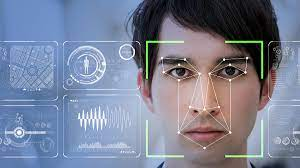

Button(description='Predict', style=ButtonStyle())

Output()

In [8]:
import ipywidgets as widgets
from IPython.display import display, Javascript
from IPython.display import Image
from google.colab import output
from google.colab.output import eval_js
from base64 import b64decode
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
widgets.Layout(width='auto',height='10px')
button = widgets.Button(description="Predict")

l = "Face recognition System"
print(l)
display(Image('/content/download.jpg', width=450,height=350))

output = widgets.Output()
style= {'button_color':'red'}
display(button, output)

def on_button_clicked(b):
    with output:
        take_photo()
        classify('/content/photo.jpg')

button.on_click(on_button_clicked)